<a href="https://colab.research.google.com/github/m-adeleke1/Association_of_Data_Scientists/blob/main/Observing_and_Tracing_Multi_Modal_Multi_Agent_Systems_Using_Portkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Library Installation

In [102]:
!pip install -qU langchain langchain_community tavily-python langchain-groq groq replicate crewai crewai[tools]
!pip install portkey-ai

### API Initialization

In [103]:
# from google.colab import userdata
# import os

# os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
# os.environ["REPLICATE_API_KEY"] = userdata.get("REPLICATE_API_KEY")
# os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")
# PORTKEY_API_KEY = userdata.get("PORTKEY_API_KEY")

In [104]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")
os.environ["REPLICATE_API_KEY"] = userdata.get("REPLICATE_API_KEY")
os.environ["TAVILY_API_KEY"] = userdata.get("TAVILY_API_KEY")
os.environ["PORTKEY_API_KEY"] = userdata.get("PORTKEY_API_KEY")
PORTKEY_API_KEY = os.environ["PORTKEY_API_KEY"]

### Web Search Tool Helper Function

In [105]:
# from langchain_community.tools.tavily_search import TavilySearchResults
# def web_search_tool(question: str) -> str:
#     """This tool is useful when we want web search for current events."""
#     websearch = TavilySearchResults()
#     response = websearch.invoke({"query":question})
#     return response

In [106]:
from langchain_community.tools.tavily_search import TavilySearchResults
import replicate

def web_search_tool(question: str) -> str:
    websearch = TavilySearchResults()
    response = websearch.invoke({"query": question})
    return response

### Text to Image Creation Helper Function

In [107]:
# import replicate
# def text2image(text:str) -> str:
#     """This tool is useful when we want to generate images from textual descriptions."""
#     output = replicate.run(
#     "adirik/flux-cinestill:216a43b9975de9768114644bbf8cd0cba54a923c6d0f65adceaccfc9383a938f",
#     input={
#         "steps": 28,
#         "prompt": text,
#         "lora_url": "",
#         "control_type": "depth",
#         "control_image": "https://replicate.delivery/pbxt/LUSNInCegT0XwStCCJjXOojSBhPjpk2Pzj5VNjksiP9cER8A/ComfyUI_02172_.png",
#         "lora_strength": 1,
#         "output_format": "webp",
#         "guidance_scale": 2.5,
#         "output_quality": 100,
#         "negative_prompt": "low quality, ugly, distorted, artefacts",
#         "control_strength": 0.45,
#         "depth_preprocessor": "DepthAnything",
#         "soft_edge_preprocessor": "HED",
#         "image_to_image_strength": 0,
#         "return_preprocessed_image": False
#         }
#     )
#     print(output)
#     return output[0]

In [108]:
import replicate
from PIL import Image
from io import BytesIO

def text2image(text: str) -> str:
    output = replicate.run(
        "adirik/flux-cinestill:216a43b9975de9768114644bbf8cd0cba54a923c6d0f65adceaccfc9383a938f",
        input={
            "steps": 28,
            "prompt": text,
            "lora_url": "",
            "control_type": "depth",
            "control_image": "https://replicate.delivery/pbxt/LUSNInCegT0XwStCCJjXOojSBhPjpk2Pzj5VNjksiP9cER8A/ComfyUI_02172_.png",
            "lora_strength": 1,
            "output_format": "webp",
            "guidance_scale": 2.5,
            "output_quality": 100,
            "negative_prompt": "low quality, ugly, distorted, artefacts",
            "control_strength": 0.45,
            "depth_preprocessor": "DepthAnything",
            "soft_edge_preprocessor": "HED",
            "image_to_image_strength": 0,
            "return_preprocessed_image": False
        }
    )
    # output is a list of FileOutput objects

    # Read the first image bytes
    image_bytes = output[0].read()  # read() returns bytes

    # Optionally save image locally
    with open("generated_image.webp", "wb") as f:
        f.write(image_bytes)

    # Return path or image bytes base64 encoded string, or display directly later
    return "generated_image.webp"

### Text to Image Processing Helper Function

In [109]:
# def image2text(image_url:str,prompt:str) -> str:
#   """This tool is useful when we want to generate textual descriptions from images."""
#   # Function
#   output = replicate.run(
#     "adirik/flux-cinestill:216a43b9975de9768114644bbf8cd0cba54a923c6d0f65adceaccfc9383a938f",
#     input={
#         "image": image_url,
#         "top_p": 1,
#         "prompt": prompt,
#         "max_tokens": 1024,
#         "temperature": 0.2
#     }
#   )
#   return "".join(output)

In [110]:
def image2text(image_url: str, prompt: str) -> str:
    output = replicate.run(
        "adirik/flux-cinestill:216a43b9975de9768114644bbf8cd0cba54a923c6d0f65adceaccfc9383a938f",
        input={
            "image": image_url,
            "top_p": 1,
            "prompt": prompt,
            "max_tokens": 1024,
            "temperature": 0.2
        }
    )
    return "".join(output)

### Router Tool Setup

In [111]:
# from crewai.tools import tool

# @tool("router tool")
# def router_tool(question:str) -> str:
#   """Router Function"""
#   prompt = f"""Based on the Question provide below determine the following:
#     1. Is the question directed at generating image ?
#     2. Is the question directed at describing the image ?
#     3. Is the question a generic one and needs to be answered by searching the web?
#     Question: {question}

#     RESPONSE INSTRUCTIONS:
#     - Answer either 1 or 2 or 3.
#     - Answer should strictly be a string.
#     - Do not provide any preamble or explanations except for 1 or 2 or 3.

#     OUTPUT FORMAT:
#     1
#     """
#   response = llm.invoke(prompt).content
#   if response == "1":
#     return 'text2image'
#   elif response == "3":
#     return 'web_search'
#   else:
#     return 'image2text'

In [112]:
from crewai.tools import tool

@tool("router_tool")
def router_tool(question: str) -> str:
    """
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    """
    prompt = f"""Based on the Question provide below determine the following:
    1. Is the question directed at generating image ?
    2. Is the question directed at describing the image ?
    3. Is the question a generic one and needs to be answered by searching the web?
    Question: {question}
    RESPONSE INSTRUCTIONS:
    - Answer either 1 or 2 or 3.
    - Answer should strictly be a string.
    - Do not provide any preamble or explanations except for 1 or 2 or 3.
    OUTPUT FORMAT:
    1
    """
    response = llm.invoke(prompt).content
    if response == "1":
        return 'text2image'
    elif response == "3":
        return 'web_search'
    else:
        return 'image2text'

### Retriever Tool

In [113]:
# @tool("retriver tool")
# def retriver_tool(router_response:str,question:str,image_url:str) -> str:
#   """Retriver Function"""
#   if router_response == 'text2image':
#     return text2image(question)
#   elif router_response == 'image2text':
#     return image2text(image_url,question)
#   else:
#     return web_search_tool(question)

In [114]:
@tool("retriever_tool")
def retriever_tool(router_response: str, question: str, image_url: str) -> str:
    """
    Uses the router_response to determine which tool to call:
    - 'text2image' calls text2image to generate an image from text
    - 'image2text' calls image2text to generate text from image URL and prompt
    - otherwise uses web_search_tool to get web search results
    """
    if router_response == 'text2image':
        return text2image(question)
    elif router_response == 'image2text':
        return image2text(image_url, question)
    else:
        return web_search_tool(question)

### Portkey Setup

In [115]:
from langchain_openai import ChatOpenAI
from portkey_ai import createHeaders, PORTKEY_GATEWAY_URL

portkey_headers = createHeaders(
        api_key = PORTKEY_API_KEY,
        virtual_key = "open-ai-virtual-07f788",
    )

llm = ChatOpenAI(api_key=PORTKEY_API_KEY, base_url=PORTKEY_GATEWAY_URL, default_headers=portkey_headers)


### Router Agent

In [116]:
from crewai import Agent
Router_Agent = Agent(
  role = 'Router',
  goal = 'Route user question to a text to image or text to speech or web search',
  backstory = (
    "You are an expert at routing a user question to a text to image or web search."
    "Use the text to image to generate images from textual descriptions."
    "Use the image to text to generate text describing the image based on the textual description."
    "Use the web search to search for current events."
    "You do not need to be stringent with the keywords in the question related to these topics. Otherwise, use web-search."
  ),
  verbose = True,
  allow_delegation = False,
  llm = llm,
  tools = [router_tool],
)

### Retriever Agent

In [117]:
Retriever_Agent = Agent(
role = "Retriever",
goal = "Use the information retrieved from the Router to answer the question and image url provided.",
backstory = (
    "You are an assistant for directing tasks to respective agents based on the response from the Router."
    "Use the information from the Router to perform the respective task."
    "Do not provide any other explanation"
),
verbose = True,
allow_delegation = False,
llm = llm,
tools = [retriver_tool],
)

### Router Task

In [118]:
from crewai import Task
router_task = Task(
    description=("Analyse the keywords in the question {question}"
    "If the question {question} instructs to describe a image then use the image url {image_url} to generate a detailed and high quality images covering all the nuances secribed in the textual descriptions provided in the question {question}."
    "Based on the keywords decide whether it is eligible for a text to image or text to speech or web search."
    "Return a single word 'text2image' if it is eligible for generating images from textual description."
    "Return a single word 'image2text' if it is eligible for describing the image based on the question {question} and image url{image_url}."
    "Return a single word 'web_search' if it is eligible for web search."
    "Do not provide any other explaination."
    ),
    expected_output=("Give a choice 'web_search' or 'text2image' or 'image2text' based on the question {question} and image url {image_url}"
    "Do not provide any preamble or explanations except for 'text2image' or 'web_search' or 'image2text'."),
    agent=Router_Agent,
)


### Retriever Task

In [119]:
retriever_task = Task(
    description=("Based on the response from the 'router_task' generate response for the question {question} with the help of the respective tool."
    "Use the web_serach_tool to retrieve information from the web in case the router task output is 'web_search'."
    "Use the text2image tool to convert the test to speech in English in case the router task output is 'text2image'."
    "Use the image2text tool to describe the image provide in the image url in case the router task output is 'image2text'."
    ),
    expected_output=("You should analyse the output of the 'router_task'"
    "If the response is 'web_search' then use the web_search_tool to retrieve information from the web."
    "If the response is 'text2image' then use the text2image tool to generate a detailed and high quality images covering all the nuances secribed in the textual descriptions provided in the question {question}."
    "If the response is 'image2text' then use the 'image2text' tool to describe the image based on the question {question} and {image_url}."
    ),
    agent=Retriever_Agent,
    context=[router_task],
)


### Crew Setup and Initiation

In [120]:
from crewai import Crew,Process
crew = Crew(
    agents=[Router_Agent,Retriever_Agent],
    tasks=[router_task,retriever_task],
    verbose=True,
)

inputs = {
  "question": "Generate an image based upon this text: a cinematic portrait of a majestic black panther, piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background",
  "image_url": ""
}

result = crew.kickoff(inputs=inputs)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 14104951-dd1e-4cb1-bf39-278fae518ad5                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Task: Analyse the keywords in the question Generate an image based upon this text: a cinematic portrait of a   │
│  majestic black panther, piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle          │
│  backgroundIf the question Generate an image based upon this text: a cinematic portrait of a majestic black     │
│  panther, piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background instructs    │
│  to describe a image then use the image url  to generate a detailed and high quality images covering all the    │
│  nuances secribed in the textual descriptions provided in the question Generate an image based upon this text:  │
│  a cinematic portrait of a majestic black panther, piercing yellow eyes, moody lighting, soft bokeh, 85mm       │
│  lens, deep blue jungle background.Based on the keywords decide whether it is eligible for a text to image or   │
│  text to speech or web search.Return a single word 'text2image' if it is eligible for generating images from    │
│  textual description.Return a single word 'image2text' if it is eligible for describing the image based on the  │
│  question Generate an image based upon this text: a cinematic portrait of a majestic black panther, piercing    │
│  yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background and image url.Return a single  │
│  word 'web_search' if it is eligible for web search.Do not provide any other explaination.                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: The question is asking whether to generate an image, describe an image, or conduct a web     │
│  search based on the keywords provided.                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: I encountered an error while trying to use the router_tool. I will now attempt to use it     │
│  again.                                                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: I encountered an error while trying to use the router_tool. I will now attempt to use it     │
│  again.                                                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: I encountered an error while trying to use the router_tool. I will now attempt to use it     │
│  again.                                                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: I encountered an error while trying to use the router_tool. I will now attempt to use it     │
│  again.                                                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: router_tool                                                                                              │
│  Error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid:                       │
│  open-ai-virtual-07f788'}                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status': 'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.
 Tool router_tool accepts these inputs: Tool Name: router_tool
Tool Arguments: {'question': {'description': None, 'type': 'str'}}
Tool Description: 
    Determines if the question is for image generation, image description, or web search.
    Returns '1' for text2image, '2' for image2text, or '3' for web_search.
    



╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: I encountered an error while trying to use the router_tool. I will now attempt to use it     │
│  again.                                                                                                         │
│                                                                                                                 │
│  Using Tool: router_tool                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"question\": \"Generate an image based upon this text: a cinematic portrait of a majestic black panther,    │
│  piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue jungle background\"}"                   │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│  I encountered an error while trying to use the tool. This was the error: Error code: 400 - {'status':          │
│  'failure', 'message': 'Following keys are not valid: open-ai-virtual-07f788'}.                                 │
│   Tool router_tool accepts these inputs: Tool Name: router_tool                                                 │
│  Tool Arguments: {'question': {'description': None, 'type': 'str'}}                                             │
│  Tool Description:                                                                                              │
│      Determines if the question is for image generation, image description, or web search.                      │
│      Returns '1' for text2image, '2' for image2text, or '3' for web_search.                                     │
│      .                                                                                                          │
│  Moving on then. I MUST either use a tool (use one at time) OR give my best final answer not both at the same   │
│  time. When responding, I must use the following format:                                                        │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: you should always think about what to do                                                              │
│  Action: the action to take, should be one of [router_tool]                                                     │
│  Action Input: the input to the action, dictionary enclosed in curly braces                                     │
│  Observation: the result of the action                                                                          │
│  ```                                                                                                            │
│  This Thought/Action/Action Input/Result can repeat N times. Once I know the final answer, I must return the    │
│  following format:                                                                                              │
│                                                                                                                 │
│  ```                                                                                                            │
│  Thought: I now can give a great answer                                                                         │
│  Final Answer: Your final answer must be the great and the most complete as possible, it must be outcome        │
│  described                                                                                                      │
│                                                                                                                 │
│  ```                                                                                                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Router                                                                                                  │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  web_search                                                                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: d0dad619-f9c2-45bb-9f5d-11ab2f25c548                                                                     │
│  Agent: Router                                                                                                  │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Retriever                                                                                               │
│                                                                                                                 │
│  Task: Based on the response from the 'router_task' generate response for the question Generate an image based  │
│  upon this text: a cinematic portrait of a majestic black panther, piercing yellow eyes, moody lighting, soft   │
│  bokeh, 85mm lens, deep blue jungle background with the help of the respective tool.Use the web_serach_tool to  │
│  retrieve information from the web in case the router task output is 'web_search'.Use the text2image tool to    │
│  convert the test to speech in English in case the router task output is 'text2image'.Use the image2text tool   │
│  to describe the image provide in the image url in case the router task output is 'image2text'.                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

 

Action 'retriver' don't exist, these are the only available Actions:
Tool Name: retriver tool
Tool Arguments: {'router_response': {'description': None, 'type': 'str'}, 'question': {'description': None, 'type':
'str'}, 'image_url': {'description': None, 'type': 'str'}}
Tool Description: Retriver Function
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
[00m
 An unknown error occurred. Please check the details below.

 Error details: maximum recursion depth exceeded

 An unknown error occurred. Please check the details below.

 Error details: maximum recursion depth exceeded

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Retriever                                                                                               │
│                                                                                                                 │
│  Task: Based on the response from the 'router_task' generate response for the question Generate an image based  │
│  upon this text: a cinematic portrait of a majestic black panther, piercing yellow eyes, moody lighting, soft   │
│  bokeh, 85mm lens, deep blue jungle background with the help of the respective tool.Use the web_serach_tool to  │
│  retrieve information from the web in case the router task output is 'web_search'.Use the text2image tool to    │
│  convert the test to speech in English in case the router task output is 'text2image'.Use the image2text tool   │
│  to describe the image provide in the image url in case the router task output is 'image2text'.                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Retriever                                                                                               │
│                                                                                                                 │
│  Thought: I should use the information from the Router to determine which tool to use for generating the        │
│  response to the question.                                                                                      │
│                                                                                                                 │
│  Using Tool: retriver tool                                                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  "{\"router_response\": \"web_search\", \"question\": \"Generate an image based upon this text: a cinematic     │
│  portrait of a majestic black panther, piercing yellow eyes, moody lighting, soft bokeh, 85mm lens, deep blue   │
│  jungle background\", \"image_url\": \"\"}"                                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  [{'title': 'Majestic Black Panther Portrait in Dramatic Darkness ...', 'url':                                  │
│  'https://stock.adobe.com/images/majestic-black-panther-portrait-in-dramatic-darkness-piercing-yellow-eyes-glo  │
│  wing-against-deep-shadow-natural-wildlife-photography/1278977542', 'content': '# Majestic Black Panther        │
│  Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep Shadow Natural Wildlife                │
│  Photography\n\n## Generated with AI\n\nEditorial use must not be misleading or deceptive.\n\n####              │
│  DIMENSIONS\n\n#### FILE TYPE\n\n#### CATEGORY\n\n#### LICENSE TYPE\n\n##### SIMILAR KEYWORDS [...] Get 10      │
│  images or 1 video with a free trial.Start free trial\n\nGet 10 images or 1 video with a free trial.Start free  │
│  trial\n\nMajestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep        │
│  Shadow Natural Wildlife Photography\n\n## Majestic Black Panther Portrait in Dramatic Darkness Piercing        │
│  Yellow Eyes Glowing Against Deep Shadow Natural Wildlife Photography', 'score': 0.5310884}, {'title': 'Steal   │
│  my prompt composer : r/ChatGPTPromptGenius - Reddit', 'url':                                                   │
│  'https://www.reddit.com/r/ChatGPTPromptGenius/comments/1knp7zg/steal_my_prompt_composer/', 'content':          │
│  "Objective: Generate a technical visual prompt in English, written as a single uninterrupted sentence with no  │
│  bullets, targeting diffusion-based image generation models. The final prompt must begin with a performance     │
│  prefix such as “masterpiece, ultra-detailed, cinematic lighting”, followed by resolution if specified. The     │
│  system does not generate images—it only composes the prompt text. [...] ### 5. Type and direction of lighting  │
│  [...] Steal my prompt composer : r/ChatGPTPromptGenius\n\n===============\nSkip to main contentSteal my        │
│  prompt composer : r/ChatGPTPromptGenius\n\nOpen menu Open navigation to make AI output a decent text-to-image  │
│  prompt. It's a 9-step interactive flow that leads to a full composition translated into prompt which you can   │
│  paste in any text-to-image generator. You can select attrib...                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Retriever                                                                                               │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Title: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep Shadow   │
│  Natural Wildlife Photography                                                                                   │
│  URL: [Link to                                                                                                  │
│  Image](https://stock.adobe.com/images/majestic-black-panther-portrait-in-dramatic-darkness-piercing-yellow-ey  │
│  es-glowing-against-deep-shadow-natural-wildlife-photography/1278977542)                                        │
│  Content: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep        │
│  Shadow Natural Wildlife Photography                                                                            │
│  Generated with AI                                                                                              │
│  Editorial use must not be misleading or deceptive.                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 700d11e4-664e-433f-ac6f-73a2381ed352                                                                     │
│  Agent: Retriever                                                                                               │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 14104951-dd1e-4cb1-bf39-278fae518ad5                                                                       │
│  Tool Args:                                                                                                     │
│  Final Output: Title: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing         │
│  Against Deep Shadow Natural Wildlife Photography                                                               │
│  URL: [Link to                                                                                                  │
│  Image](https://stock.adobe.com/images/majestic-black-panther-portrait-in-dramatic-darkness-piercing-yellow-ey  │
│  es-glowing-against-deep-shadow-natural-wildlife-photography/1278977542)                                        │
│  Content: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep        │
│  Shadow Natural Wildlife Photography                                                                            │
│  Generated with AI                                                                                              │
│  Editorial use must not be misleading or deceptive.                                                             │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### Agent Output -- Image Link

In [121]:
result.raw

'Title: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep Shadow Natural Wildlife Photography\nURL: [Link to Image](https://stock.adobe.com/images/majestic-black-panther-portrait-in-dramatic-darkness-piercing-yellow-eyes-glowing-against-deep-shadow-natural-wildlife-photography/1278977542)\nContent: Majestic Black Panther Portrait in Dramatic Darkness Piercing Yellow Eyes Glowing Against Deep Shadow Natural Wildlife Photography\nGenerated with AI\nEditorial use must not be misleading or deceptive.'

### Printing Image

In [122]:
# import requests
# from PIL import Image
# from io import BytesIO
# import matplotlib.pyplot as plt

# image_data = result.raw  # This should be a parsed JSON/list, not string

# if isinstance(image_data, list) and 'url' in image_data[0]:
#     image_url = image_data[0]['url']
# else:
#     image_url = image_data  # fallback

# response = requests.get(image_url)

# # # URL of the image
# # image_url = result.raw

# # # Fetch the image
# # response = requests.get(image_url)

# # Check if the request was successful
# if response.status_code == 200:
#     # Open the image using PIL
#     img = Image.open(BytesIO(response.content))

#     # Display the image using matplotlib
#     plt.imshow(img)
#     plt.axis('off')  # Hide the axis
#     plt.show()
# else:
#     print("Failed to retrieve image. Status code:", response.status_code)

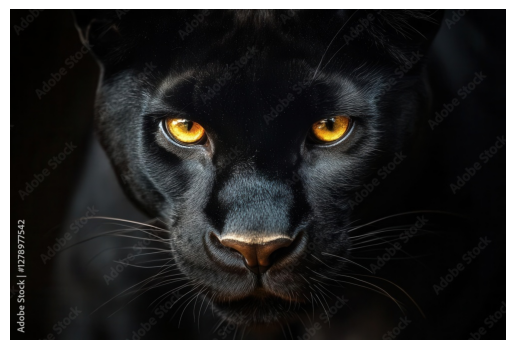

In [129]:
import re

import json
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Parse raw result JSON if needed
if isinstance(result.raw, str):
    try:
        image_data = json.loads(result.raw)
    except json.JSONDecodeError:
        image_data = result.raw
else:
    image_data = result.raw

# Extract image URL
if isinstance(image_data, list) and len(image_data) > 0 and 'url' in image_data[0]:
    image_url = image_data[0]['url']
elif isinstance(image_data, dict) and 'url' in image_data:
    image_url = image_data['url']
else:
    image_url = ""

image_url = "https://as2.ftcdn.net/jpg/12/78/97/75/1000_F_1278977542_zi4leN47Owq9IgdNydad0F3QwLSn9aYi.jpg"

# raw_text = result.raw  # Your raw markdown-style text

# # Regex pattern to extract URL from markdown link
# match = re.search(r'\[Link to Image\]\((https?://[^)]+)\)', raw_text)

# if match:
#     image_url = match.group(1)
#     print(f"Extracted URL: {image_url}")
# else:
#     image_url = ""
#     print("Could not find valid image URL")

if image_url.startswith("http://") or image_url.startswith("https://"):
    response = requests.get(image_url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        print("Failed to retrieve image. Status code:", response.status_code)
else:
    print("Invalid or missing image URL:", image_url)